In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# functions

# a function which draws (onto the img1) the epilines (found in lines) from the points
# found on the img2
def drawlines(img1,img2,lines,pts1,pts2):
    ''' img1 - image on which we draw the epilines for the points in img2
        lines - corresponding epilines '''
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    
    return img1

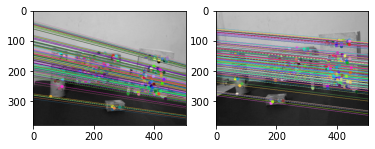

In [2]:
# question 1

left_img = cv2.imread('left.jpg',0)
right_img = cv2.imread('right.jpg',0)

sift = cv2.xfeatures2d.SIFT_create()

# find points
kp1, des1 = sift.detectAndCompute(left_img,None)
kp2, des2 = sift.detectAndCompute(right_img,None)

# gather parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

# detect matches
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

good = []
pts1 = []
pts2 = []

# perform ratio test
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)

# select inlier points
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]

# Find epilines to right image points and draw its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
final_image_left = drawlines(left_img,right_img,lines1,pts1,pts2)

# Find epilines to left image points and draw its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
final_image_right = drawlines(right_img,left_img,lines2,pts2,pts1)

# display results
plt.subplot(121),plt.imshow(final_image_left)
plt.subplot(122),plt.imshow(final_image_right)
plt.show()

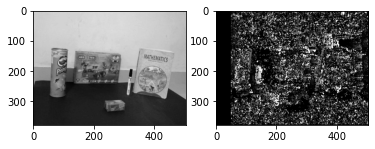

In [3]:
# question 2

import numpy as np
import cv2
from matplotlib import pyplot as plt

# read images
left_image = cv2.imread('left.jpg',0)
right_image = cv2.imread('right.jpg',0)

# create stereo
stereo = cv2.StereoBM_create(numDisparities=48, blockSize=5)

# make disparity map
disparity = stereo.compute(left_image,right_image)

# display results
plt.subplot(121),plt.imshow(left_image, 'gray')
plt.subplot(122),plt.imshow(disparity, 'gray')
plt.show()

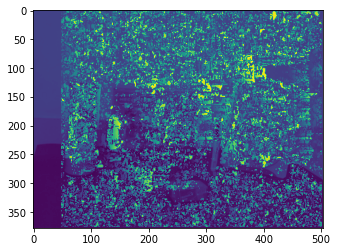

In [4]:
# maybe I'm not really sure about this part
plt.imshow((disparity+left_image))